In [ ]:
pip install quandl

In [ ]:
import quandl

In [ ]:
QUANDL_API_KEY = 'xsxPzeok_gFr763nLykL'

In [ ]:
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [ ]:
df = quandl.get('BSE/BOM500570')


In [ ]:
df.head()

In [ ]:
df.shape

(7695, 12)

In [ ]:
df.tail

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib

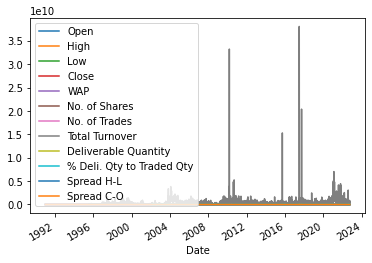

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot();

In [ ]:
Close = df['Close']

In [ ]:
Close

Date
1991-01-02    182.50
1991-01-03    182.50
1991-01-07    176.25
1991-01-09    171.25
1991-01-11    175.00
               ...  
2022-09-26    397.65
2022-09-27    398.80
2022-09-28    399.05
2022-09-29    402.30
2022-09-30    404.65
Name: Close, Length: 7695, dtype: float64

In [ ]:
Close.head()

Date
1991-01-02    182.50
1991-01-03    182.50
1991-01-07    176.25
1991-01-09    171.25
1991-01-11    175.00
Name: Close, dtype: float64

In [ ]:
High = df['High']

In [ ]:
High

Date
1991-01-02    182.50
1991-01-03    182.50
1991-01-07    177.50
1991-01-09    177.50
1991-01-11    175.00
               ...  
2022-09-26    417.65
2022-09-27    404.20
2022-09-28    406.40
2022-09-29    413.35
2022-09-30    408.25
Name: High, Length: 7695, dtype: float64

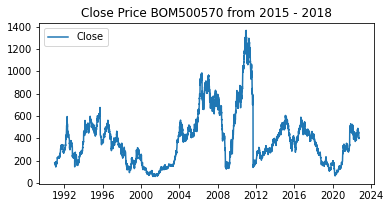

In [ ]:
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(Close.index, Close, label='Close')
plt.title('Close Price BOM500570 from 2015 - 2018')
plt.legend(loc=2)

In [ ]:
#Plotting Candelstick

In [ ]:
pip install mplfinance

In [ ]:
import mplfinance as mplfinance

In [ ]:
pip install --upgrade mplfinance

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [ ]:
import mpl_finance

In [ ]:
from mpl_finance import candlestick_ohlc

In [ ]:
import matplotlib.dates as mdates

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import quandl

In [ ]:
QUANDL_API_KEY = 'xsxPzeok_gFr763nLykL'

In [ ]:
df_subset = quandl.get('BSE/BOM500570', 
                       start_date='2022-09-01', 
                       end_date='2022-09-30')


In [ ]:
df_subset['Date'] = df_subset.index.map(mdates.date2num)

In [ ]:
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Close']]

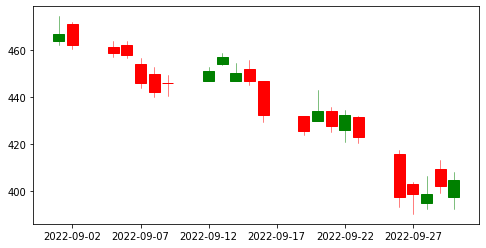

In [ ]:
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Close']]

figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                 df_ohlc.values, 
                 width=0.8, 
                 colorup='green', 
                 colordown='red')
plt.show()


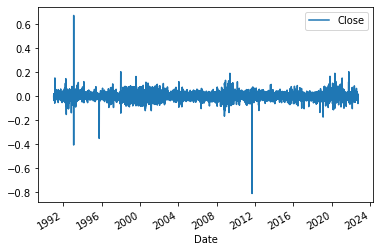

In [21]:
#Plotting Returns
%matplotlib inline
import quandl
QUANDL_API_KEY = 'xsxPzeok_gFr763nLykL'
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('BSE/BOM500570.4')
monthly_changes = df.pct_change(periods=1)
monthly_changes.plot();





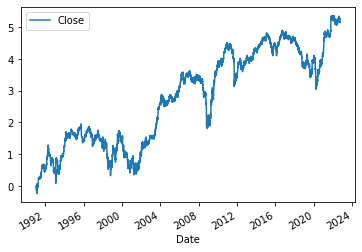

In [22]:
#Plotting Cumulative Returns
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();


,Close
count,7694.000000
mean,0.000671
std,0.031743
min,-0.808277
25%,-0.014313
50%,0.000000
75%,0.015147
max,0.672414


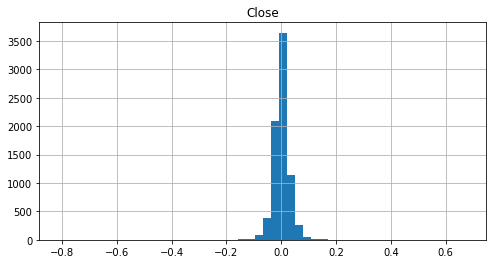

In [26]:
#Plotting Histograms
daily_changes.hist(bins=50, figsize=(8, 4));
daily_changes.describe()


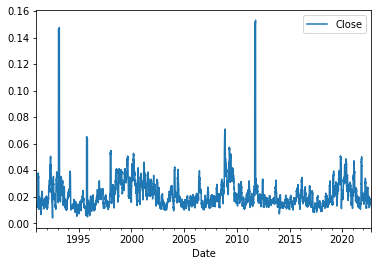

In [34]:
#Plotting Volatility
df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();


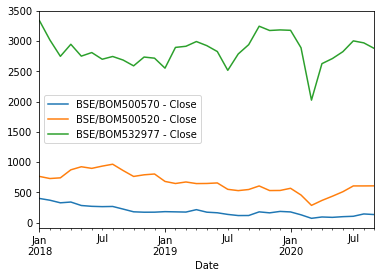

In [42]:
#Downloading Multiple Time Series
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['BSE/BOM500570.4', 
                 'BSE/BOM500520.4', 
                 'BSE/BOM532977.4'], 
                collapse='monthly', 
                start_date='2018-01-01', 
                end_date='2020-09-30')
df.plot();


In [43]:
#Displaying the Correlation Matrix
df.pct_change().corr()


,BSE/BOM500570 - Close,BSE/BOM500520 - Close,BSE/BOM532977 - Close
BSE/BOM500570 - Close,1.000000,0.599686,0.645990
BSE/BOM500520 - Close,0.599686,1.000000,0.745723
BSE/BOM532977 - Close,0.645990,0.745723,1.000000


In [ ]:
#Plotting Correlations
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['BSE/BOM500570.4', 'BSE/BOM500520.4'], 
                start_date='2018-01-01', 
                end_date='2022-09-30')
df_filled = df.asfreq('D', method='ffill')
daily_changes= df_filled.pct_change()
abn_returns = daily_changes['BSE/BOM500570.4']
santa_returns = daily_changes['BSE/BOM500520.4']
window = int(len(df_filled.index)/2)
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=santa_returns)\
    .dropna()
df_corrs.plot(figsize=(12, 8));


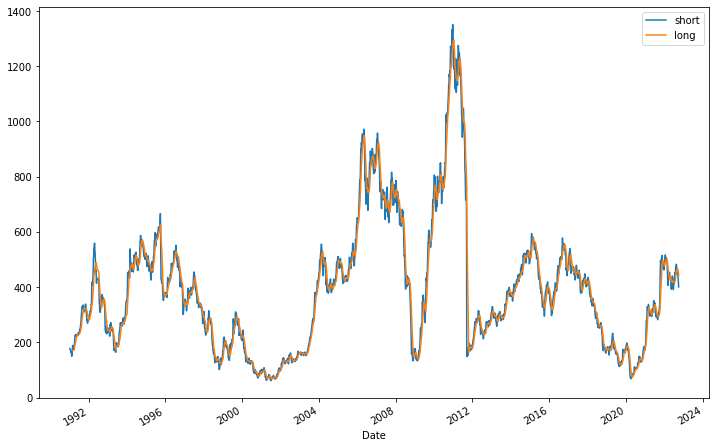

In [69]:
#Simple Moving Averages
%matplotlib inline
import quandl
import pandas as pd
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('BSE/BOM500570.4')
df_filled = df.asfreq('D', method='ffill')
df_last = df['Close']
series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()
df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));


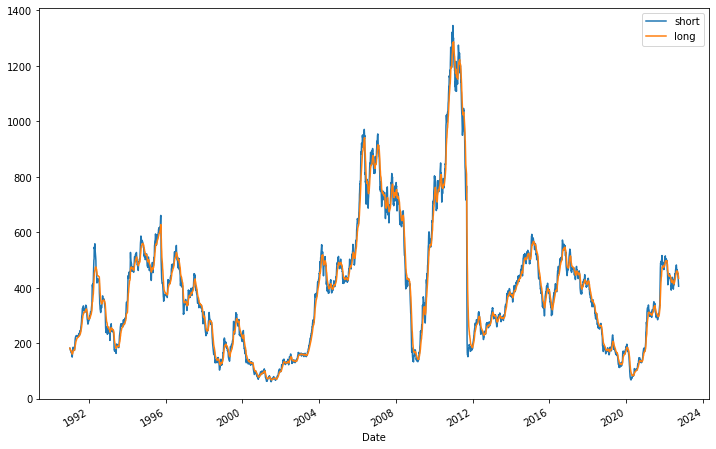

In [71]:
#Exponential Moving Averages
%matplotlib inline
import quandl
import pandas as pd
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('BSE/BOM500570.4')
df_filled = df.asfreq('D', method='ffill')
df_last = df['Close']
series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()
df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

